In [1]:
import pandas as pd

from autumn.tools.project import get_project, load_timeseries, build_rel_path

In [2]:
region = "bangladesh"
project = get_project("sm_sir", region, reload=True)

In [3]:
timeseries_path = str(project.get_path() / "timeseries.json")
ts_set = load_timeseries(timeseries_path)
notif_smooth = pd.Series(ts_set["notifications"].rolling(window=7, center=True).mean())

In [4]:
results = project.run_baseline_model(project.param_set.baseline)

In [5]:
results.derived_outputs["notif_change"]

array([   0.        ,   45.95137936,  351.25319453,  441.75917078,
        165.4514591 , -111.71257033, -221.77875312, -212.41165313,
       -160.87540463, -108.99037569,  -69.69541277])

<AxesSubplot:>

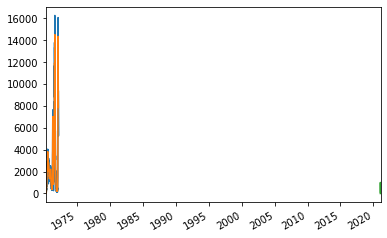

In [9]:
ts_set["notifications"].plot()
notif_smooth.plot()
derived_outputs = results.get_derived_outputs_df()
derived_outputs["notifications"].plot()